<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/Data_Mining_Project_Predicting_Missing_Values_using_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**กลุ่ม น้องก้อง(กิตติภัค)และผองเพื่อน**


In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1) Importing Dataset**

In [230]:
from google.colab import files
uploaded = files.upload()

In [231]:
df = pd.read_csv('/content/insurance.csv')

In [232]:
# Showing first five rows of the data frame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [233]:
# Showing the numbers of rows (data points) and columns (features)
df.shape

(1338, 7)

In [234]:
# Showing the Statistical measures of the data
df.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [235]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338
unique,NaN,2,NaN,NaN,2,4,1279
top,NaN,male,NaN,NaN,no,southeast,?
freq,NaN,676,NaN,NaN,1064,364,59
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN


In [236]:
"""
age = อายุ
sex = เพศ
bmi = ค่า bmi (body mass index)
children = จำนวนบุตรที่มี
smoker = ดูดบุหรี่ไหม
region = อาศัยอยู่แถวภาคไหน
charges = ค่าใช้จ่าย
"""

'\nage = อายุ\nsex = เพศ\nbmi = ค่า bmi (body mass index)\nchildren = จำนวนบุตรที่มี\nsmoker = ดูดบุหรี่ไหม\nregion = อาศัยอยู่แถวภาคไหน\ncharges = ค่าใช้จ่าย\n'

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [238]:
for i in df.columns:
  print(df[i].value_counts())
  print()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

male      676
female    662
Name: sex, dtype: int64

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

?             59
1639.5631      2
16884.924      1
7243.8136      1
1634.5734      1
 

## **2) Data Visualization**

Categorical Features:
- Sex
- Smoker
- Region

Numerical Feature:
- age
- bmi
- children
- charges

**- Sex**

In [239]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

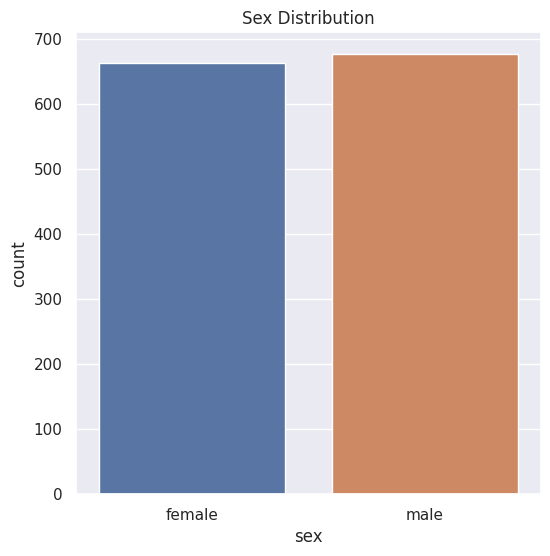

In [240]:
# Sex column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

**- Smoker**

In [241]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

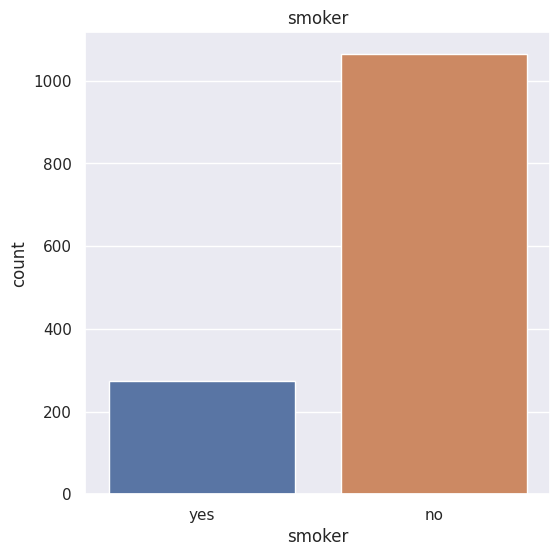

In [242]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

**- region**

In [243]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

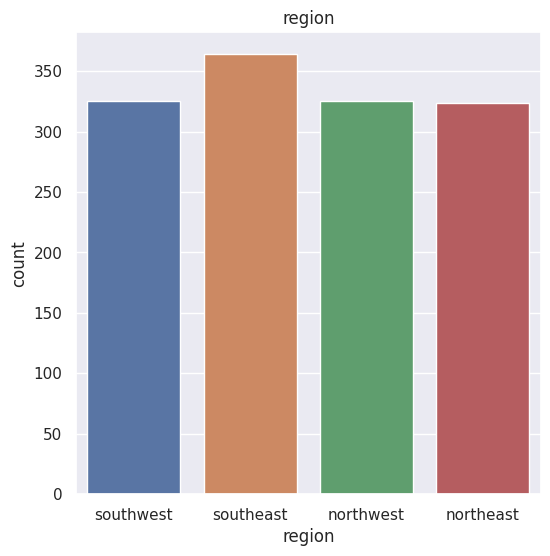

In [244]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

**- Children**

In [245]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

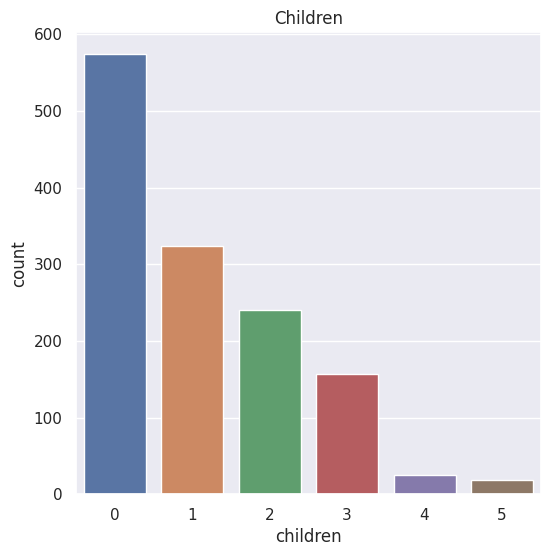

In [246]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

**- Age**

<ipython-input-247-8f7e8d1092d2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


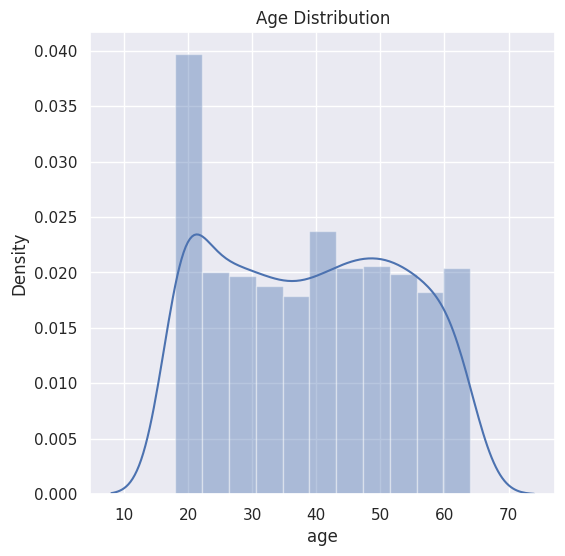

In [247]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

**bmi**

<ipython-input-248-fa5a17d58dfb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


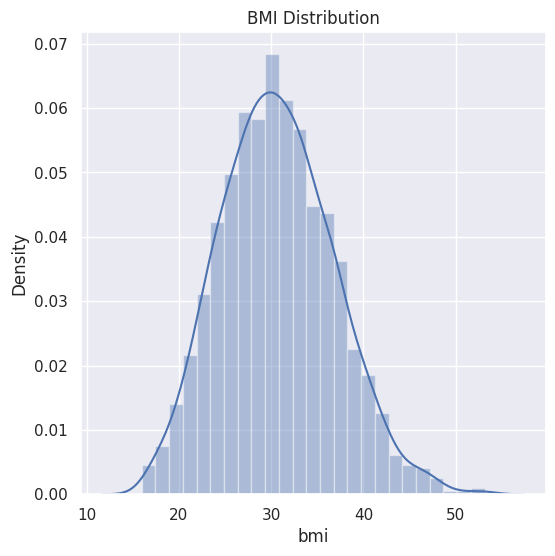

In [248]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

## **3) Processing Missing Values by Predicting Missing Values using ML Algorithms**

In [249]:
df_process = df.copy()

In [250]:
df_process.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


### **3.1.1) Encoding - Transforming Categorical Data to Numerical Data**

In [251]:
# Transforming Categorical Data to Numerical Data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in ["sex", "smoker", "region"]:
  df_process[feature] = encoder.fit_transform(df_process[feature])

In [252]:
df_process.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.5523
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.8552


In [253]:
(df_process == '?').sum(axis=0) #axis = 0 for column

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges     59
dtype: int64

In [254]:
# Replace ค่า "?" ด้วย NaN
df_process.replace('?', np.NaN, inplace=True)

In [255]:
(df_process == '?').sum(axis=0) #axis = 0 for column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **3.1.2) Train/Test splitting**

- Separate the null values from the data frame (df) and create a variable “for_prediction_data”

In [256]:
for_prediction_data = df_process[df_process["charges"].isnull()]

In [257]:
for_prediction_data

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,NaN
25,59,0,27.720,3,0,2,NaN
57,18,1,31.680,2,1,2,NaN
80,31,1,26.885,1,0,0,NaN
116,58,1,49.060,0,0,2,NaN
154,40,0,25.460,1,0,0,NaN
178,46,0,28.900,2,0,3,NaN
194,18,1,34.430,0,0,2,NaN
242,55,0,26.800,1,0,3,NaN
243,40,1,35.300,3,0,3,NaN


- Drop the null values from the data frame (df) and represent 80% of them as "train data” and 20% of them as "test data"

In [258]:
df_process.dropna(inplace = True)

In [259]:
df_process

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.5523
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.8552
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.685
1333,50,1,30.970,3,0,1,10600.5483
1334,18,0,31.920,0,0,0,2205.9808
1335,18,0,36.850,0,0,2,1629.8335


In [260]:
df_process.drop("charges", axis=1).shape

(1279, 6)

In [261]:
X = df_process.drop("charges", axis=1).values
Y = df_process["charges"].values

In [262]:
print(X)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   31.92  0.    0.    0.  ]
 [18.    0.   36.85  0.    0.    2.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


In [263]:
X.shape

(1279, 6)

In [264]:
print(Y)

['16884.924' '1725.5523' '4449.462' ... '2205.9808' '1629.8335'
 '29141.3603']


In [265]:
Y = [eval(numeric_string) for numeric_string in Y]
print(Y)

[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 6406.4107, 28923.13692, 2721.3208, 27808.7251, 1826.843, 11090.7178, 39611.7577, 1837.237, 10797.3362, 2395.17155, 10602.385, 36837.467, 13228.84695, 4149.736, 1137.011, 37701.8768, 6203.90175, 14451.83515, 12268.63225, 2775.19215, 38711, 35585.576, 2198.18985, 4687.797, 13770.0979, 51194.55914, 1625.43375, 15612.19335, 2302.3, 39774.2763, 48173.361, 3046.062, 4949.7587, 6272.4772, 6313.759, 6079.6715, 20630.28351, 3393.35635, 3556.9223, 12629.8967, 38709.176, 2211.13075, 3579.8287, 23568.272, 37742.5757, 8059.6791, 47496.49445, 13607.36875, 23244.7902, 5989.52365, 8606.2174, 4504.6624, 30166.61817, 4133.64165, 14711.7438, 1743.214, 14235.072, 6389.37785, 5920.1041, 17663.1442, 16577.7795, 6799.458, 11741.726, 11946.6259, 7726.854, 11356.6609, 3947.4131, 1532.4697, 2755.02095, 6571.02435, 7935.29115, 37165.1638, 11033.6617, 39836.519, 21098.55405, 43578.9394, 11073.176, 8026.6666, 11082.5772, 2026.9741, 1094

Step 2.1.3)
Splitting the dataset into the Training set and Test set

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [267]:
print(X_train)

[[49.     0.    33.345  2.     0.     0.   ]
 [21.     1.    26.03   0.     0.     0.   ]
 [38.     1.    16.815  2.     0.     0.   ]
 ...
 [60.     1.    32.8    0.     1.     3.   ]
 [54.     1.    30.02   0.     0.     1.   ]
 [45.     1.    20.35   3.     0.     2.   ]]


In [268]:
print(X_test)

[[54.     0.    31.9    3.     0.     2.   ]
 [27.     1.    31.13   1.     1.     2.   ]
 [64.     1.    33.88   0.     1.     2.   ]
 ...
 [49.     1.    35.86   0.     0.     2.   ]
 [45.     0.    35.815  0.     0.     1.   ]
 [19.     0.    30.495  0.     0.     1.   ]]


In [269]:
print(Y_train)

[10370.91255, 2102.2647, 6640.54485, 6313.759, 30942.1918, 2250.8352, 44400.4064, 12096.6512, 11286.5387, 10355.641, 11073.176, 38245.59327, 6571.02435, 1615.7667, 12265.5069, 1621.3402, 25309.489, 1711.0268, 4234.927, 4347.02335, 10795.93733, 42760.5022, 14283.4594, 58571.07448, 4738.2682, 9957.7216, 13880.949, 6185.3208, 1646.4297, 36124.5737, 1634.5734, 26109.32905, 11657.7189, 40182.246, 10601.412, 1515.3449, 25081.76784, 5438.7491, 41097.16175, 11365.952, 14256.1928, 5002.7827, 1146.7966, 6746.7425, 2632.992, 7358.17565, 4747.0529, 15612.19335, 11082.5772, 8410.04685, 10450.552, 13555.0049, 47928.03, 2497.0383, 16085.1275, 1981.5819, 34672.1472, 8442.667, 36898.73308, 6311.952, 4753.6368, 10713.644, 28476.73499, 3994.1778, 1121.8739, 15828.82173, 62592.87309, 4462.7218, 36197.699, 6358.77645, 5031.26955, 4673.3922, 3044.2133, 18955.22017, 13462.52, 2166.732, 6748.5912, 2438.0552, 7046.7222, 27808.7251, 20878.78443, 10923.9332, 24393.6224, 8017.06115, 15555.18875, 2457.502, 2473.33

In [270]:
print(Y_test)

[27322.73386, 34806.4677, 46889.2612, 11520.09985, 36580.28216, 4133.64165, 8125.7845, 5488.262, 1880.487, 1253.936, 12648.7034, 13217.0945, 1880.07, 17043.3414, 7152.6714, 9304.7019, 9704.66805, 9283.562, 2755.02095, 9222.4026, 7160.3303, 9583.8933, 7147.4728, 15170.069, 12479.70895, 16657.71745, 12094.478, 5148.5526, 5116.5004, 21098.55405, 9282.4806, 5484.4673, 14478.33015, 13204.28565, 46151.1245, 12235.8392, 10594.50155, 12797.20962, 7731.4271, 8835.26495, 37133.8982, 19515.5416, 23401.30575, 19673.33573, 5469.0066, 3292.52985, 10043.249, 11534.87265, 27375.90478, 1261.442, 2709.1119, 7441.053, 2322.6218, 6610.1097, 5910.944, 5920.1041, 11093.6229, 9855.1314, 4686.3887, 2899.48935, 4827.90495, 24535.69855, 5267.81815, 9875.6804, 14449.8544, 6781.3542, 30184.9367, 12638.195, 11881.358, 9193.8385, 4243.59005, 39241.442, 5630.45785, 4646.759, 4435.0942, 6113.23105, 10965.446, 6555.07035, 1909.52745, 2156.7518, 7209.4918, 5397.6167, 6775.961, 7954.517, 7160.094, 39597.4072, 47269.854,

### **- Feature Scaling**

In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [272]:
print(X_train)

[[ 0.71510443 -1.01675819  0.43127534  0.7420692  -0.52493914 -1.379453  ]
 [-1.2739664   0.98351802 -0.76403319 -0.90464835 -0.52493914 -1.379453  ]
 [-0.06631625  0.98351802 -2.26981147  0.7420692  -0.52493914 -1.379453  ]
 ...
 [ 1.49652512  0.98351802  0.34221954 -0.90464835  1.90498275  1.32914666]
 [ 1.07029565  0.98351802 -0.11204672 -0.90464835 -0.52493914 -0.47658645]
 [ 0.43095146  0.98351802 -1.69217433  1.56542797 -0.52493914  0.4262801 ]]


In [273]:
print(X_test)

[[ 1.07029565 -1.01675819  0.19515492  1.56542797 -0.52493914  0.4262801 ]
 [-0.84773693  0.98351802  0.06933297 -0.08128958  1.90498275  0.4262801 ]
 [ 1.78067809  0.98351802  0.51869708 -0.90464835  1.90498275  0.4262801 ]
 ...
 [ 0.71510443  0.98351802  0.84223924 -0.90464835 -0.52493914  0.4262801 ]
 [ 0.43095146 -1.01675819  0.83488601 -0.90464835 -0.52493914 -0.47658645]
 [-1.41604289 -1.01675819 -0.03442929 -0.90464835 -0.52493914 -0.47658645]]


## **3.1.3) Model Fitting and Evaluation**

**- Fitting the LinearRegression Model**

In [274]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [275]:
lr_model.fit(X_train, Y_train)

LinearRegression()

**- Linear Regression - Model Evaluation**


In [276]:
# Prediction on training data
training_data_prediction = lr_model.predict(X_train)

In [277]:
# Using R squared value for evaluation
from sklearn import metrics
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [278]:
print("R Squared Value = ", r2_train)

R Squared Value =  0.7505304668630712


In [279]:
# Prediction on test data
test_data_prediction = lr_model.predict(X_test)

In [280]:
# R Squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [281]:
print("R Squared Value = ", r2_test)

R Squared Value =  0.7609906141350713


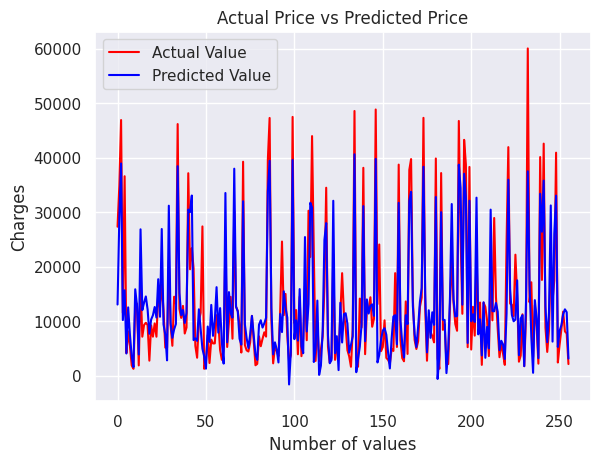

In [282]:
# Visualize the result of Linear Regression Model - Compare the Actual Values and Predicted Values in a Plot
Y_test_plot = list(Y_test)

plt.plot(Y_test_plot, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [283]:
#=================================================================================================================================================#

## **Extra: Try using other models**

Note:
- R-squared measures the goodness of fit of a regression model. Hence, a higher R-squared indicates the model is a good fit, while a lower R-squared indicates the model is not a good fit.
- The lower the MAE score the better. This is because MAE is a measure of the average error between the predictions and intended targets, thus we want to minimise this value.

In [284]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [285]:
# list of regressors
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    XGBRegressor()
]

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.005s
	Explained variance: 0.8231094760139249
	Mean absolute error: 3114.7212075296875
	R2 score: 0.8230703726868235


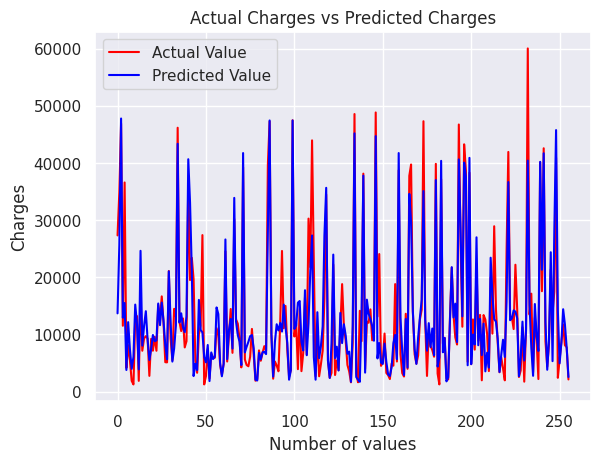


GradientBoostingRegressor()
	Training time: 0.257s
	Prediction time: 0.001s
	Explained variance: 0.864541375408953
	Mean absolute error: 2636.9798166663577
	R2 score: 0.8640100034547575


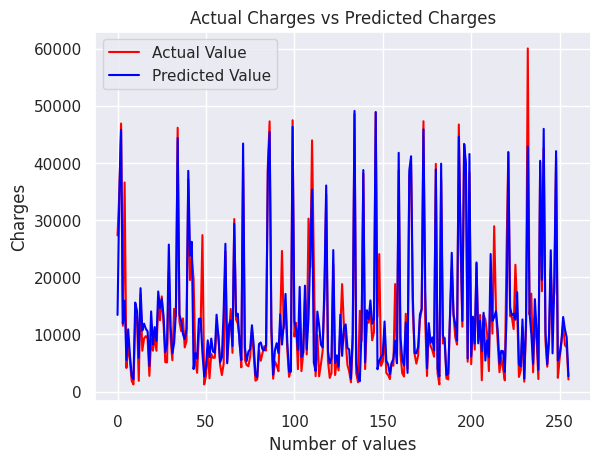


ExtraTreesRegressor()
	Training time: 0.451s
	Prediction time: 0.012s
	Explained variance: 0.7938184761815787
	Mean absolute error: 2966.6444150540233
	R2 score: 0.7898096289791546


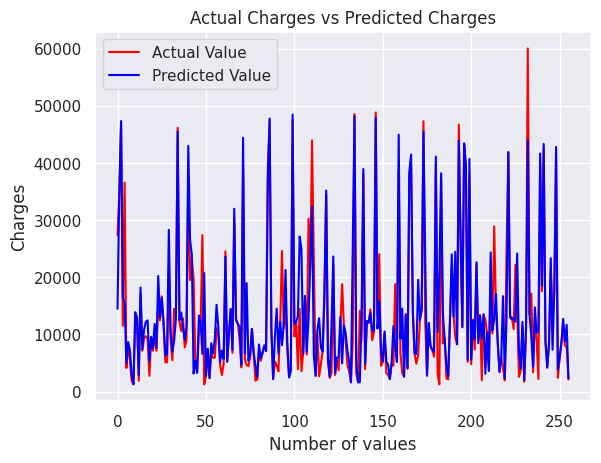


RandomForestRegressor()
	Training time: 1.238s
	Prediction time: 0.027s
	Explained variance: 0.838441442185225
	Mean absolute error: 2854.1305521154304
	R2 score: 0.8353668753013235


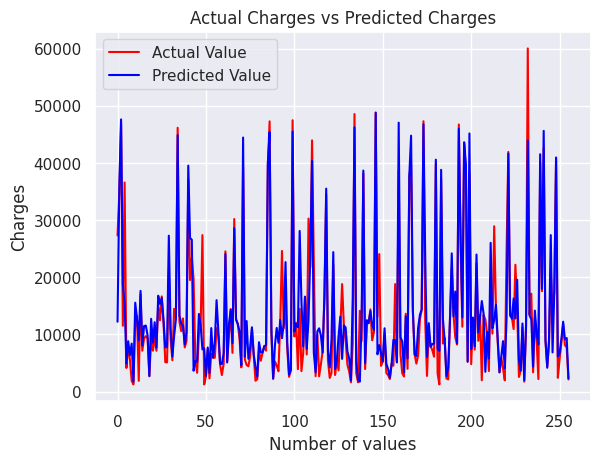


DecisionTreeRegressor()
	Training time: 0.006s
	Prediction time: 0.000s
	Explained variance: 0.6850763286872481
	Mean absolute error: 3252.5141076367186
	R2 score: 0.6834821570417554


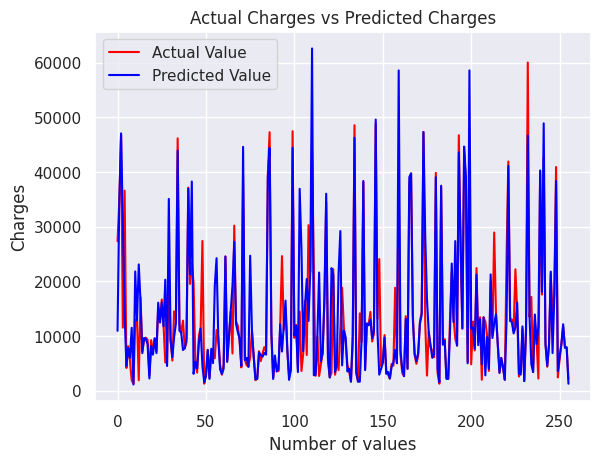


LinearRegression()
	Training time: 0.005s
	Prediction time: 0.000s
	Explained variance: 0.7613512342785913
	Mean absolute error: 4178.280868261418
	R2 score: 0.7609906141350713


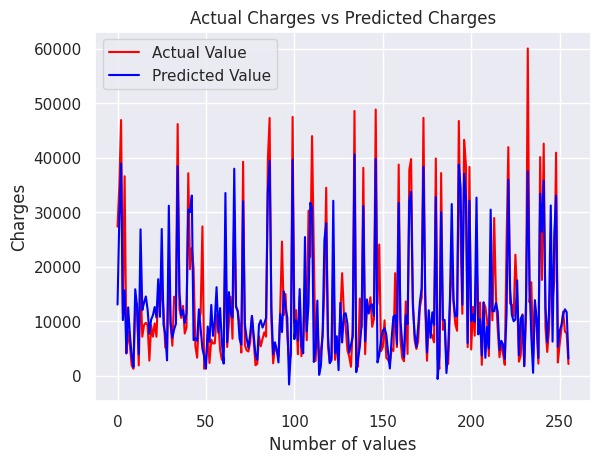


Lasso()
	Training time: 0.006s
	Prediction time: 0.000s
	Explained variance: 0.7613419068087037
	Mean absolute error: 4178.414085101126
	R2 score: 0.7609809346988364


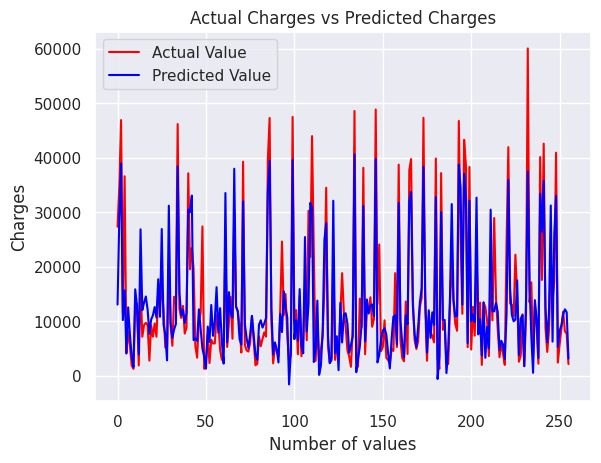


Ridge()
	Training time: 0.003s
	Prediction time: 0.000s
	Explained variance: 0.7613023606451041
	Mean absolute error: 4180.231624606131
	R2 score: 0.7609431669638305


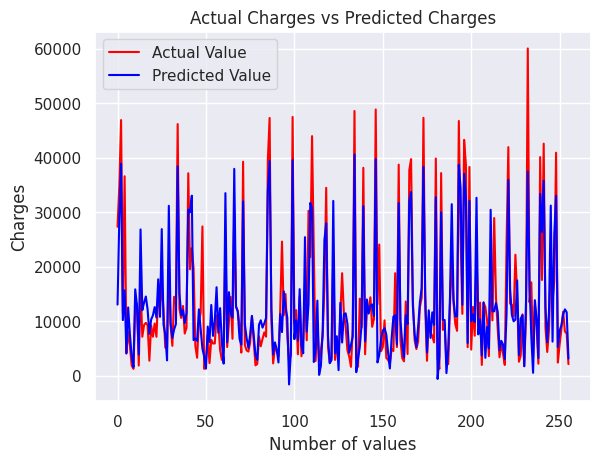


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
	Training time: 0.126s
	Prediction time: 0.002s
	Explained variance: 0.8125336138905513
	Mean absolute error: 3166.539609452515
	R2 score: 0.8103574872293571


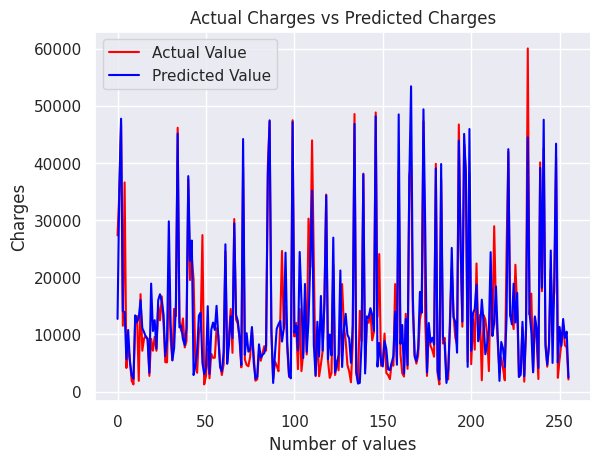

In [286]:
for model in regressors[:]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_test, y_pred))
    print("\tR2 score:", r2_score(Y_test, y_pred))

    # Visualize the result - Compare the Actual Values and Predicted Values in a Plot
    Y_test_plot = list(Y_test)
    plt.plot(Y_test_plot, color='red', label = 'Actual Value')
    plt.plot(y_pred, color='blue', label='Predicted Value')
    plt.title('Actual Charges vs Predicted Charges')
    plt.xlabel('Number of values')
    plt.ylabel('Charges')
    plt.legend()
    plt.show()
    print()

GradientBoostingRegressor() is the best as it has the highest R2 score => R2 score: 0.8640147320971926


**Try Linear Regression for predicting the missing values in the dataset**

In [287]:
# Linear Regression
for_prediction_data_by_linear = for_prediction_data.copy()
pred = for_prediction_data_by_linear.iloc[:, :-1]
charges_pred = lr_model.predict(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [288]:
charges_pred

array([207531.9228327 , 285300.34988596, 157568.56896203, 183908.03558172,
       328016.47665036, 212802.92314033, 240839.97120689, 153161.61414493,
       267794.54103524, 234077.73328844, 163203.62963408, 281597.52921621,
       235778.54893428, 248422.59275737, 186380.87399991, 278447.56166143,
       175753.19490384, 280714.12904731, 142493.25283588, 137737.05913703,
       241509.32993578, 237042.16411768, 257878.23664093, 285846.61914259,
       273380.04115251, 162284.09538156, 269554.21331554, 270931.57097078,
       325642.43485332, 214459.36993486, 280241.30740896, 228351.60029831,
       210436.99022415, 255623.81516925, 158427.03198532, 286604.25121411,
       141068.99604847, 160237.89111737, 149126.35805919, 222392.07500746,
       185887.4057969 , 135580.21684593, 177972.50894488, 270136.87782661,
       243386.49197796, 196383.70681869, 304123.38204379, 267153.59934039,
       121089.64115534, 238796.57332804, 140281.25855702, 261830.44715885,
       212090.74014455, 2

In [289]:
for_prediction_data_by_linear["charges"] = charges_pred

In [290]:
for_prediction_data_by_linear

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,207531.922833
25,59,0,27.720,3,0,2,285300.349886
57,18,1,31.680,2,1,2,157568.568962
80,31,1,26.885,1,0,0,183908.035582
116,58,1,49.060,0,0,2,328016.476650
154,40,0,25.460,1,0,0,212802.923140
178,46,0,28.900,2,0,3,240839.971207
194,18,1,34.430,0,0,2,153161.614145
242,55,0,26.800,1,0,3,267794.541035
243,40,1,35.300,3,0,3,234077.733288


**Try GradientBoostingRegressor for predicting the missing values in the dataset**

In [291]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor()
for_prediction_data_by_GradientBoosting = for_prediction_data.copy()
pred2 = for_prediction_data_by_GradientBoosting.iloc[:, :-1]
charges_pred2 = lr_model.predict(pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [292]:
charges_pred2

array([207531.9228327 , 285300.34988596, 157568.56896203, 183908.03558172,
       328016.47665036, 212802.92314033, 240839.97120689, 153161.61414493,
       267794.54103524, 234077.73328844, 163203.62963408, 281597.52921621,
       235778.54893428, 248422.59275737, 186380.87399991, 278447.56166143,
       175753.19490384, 280714.12904731, 142493.25283588, 137737.05913703,
       241509.32993578, 237042.16411768, 257878.23664093, 285846.61914259,
       273380.04115251, 162284.09538156, 269554.21331554, 270931.57097078,
       325642.43485332, 214459.36993486, 280241.30740896, 228351.60029831,
       210436.99022415, 255623.81516925, 158427.03198532, 286604.25121411,
       141068.99604847, 160237.89111737, 149126.35805919, 222392.07500746,
       185887.4057969 , 135580.21684593, 177972.50894488, 270136.87782661,
       243386.49197796, 196383.70681869, 304123.38204379, 267153.59934039,
       121089.64115534, 238796.57332804, 140281.25855702, 261830.44715885,
       212090.74014455, 2

In [293]:
for_prediction_data_by_GradientBoosting["charges"] = charges_pred2

In [294]:
for_prediction_data_by_GradientBoosting

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,207531.922833
25,59,0,27.720,3,0,2,285300.349886
57,18,1,31.680,2,1,2,157568.568962
80,31,1,26.885,1,0,0,183908.035582
116,58,1,49.060,0,0,2,328016.476650
154,40,0,25.460,1,0,0,212802.923140
178,46,0,28.900,2,0,3,240839.971207
194,18,1,34.430,0,0,2,153161.614145
242,55,0,26.800,1,0,3,267794.541035
243,40,1,35.300,3,0,3,234077.733288


See the differences

In [295]:
tmp = for_prediction_data_by_linear["charges"] - for_prediction_data_by_GradientBoosting["charges"]

In [296]:
tmp

7       0.0
25      0.0
57      0.0
80      0.0
116     0.0
154     0.0
178     0.0
194     0.0
242     0.0
243     0.0
274     0.0
283     0.0
285     0.0
299     0.0
303     0.0
317     0.0
324     0.0
344     0.0
349     0.0
362     0.0
368     0.0
372     0.0
393     0.0
401     0.0
416     0.0
436     0.0
460     0.0
474     0.0
493     0.0
505     0.0
552     0.0
596     0.0
646     0.0
683     0.0
723     0.0
765     0.0
791     0.0
809     0.0
855     0.0
878     0.0
914     0.0
938     0.0
983     0.0
1022    0.0
1057    0.0
1083    0.0
1088    0.0
1098    0.0
1129    0.0
1133    0.0
1163    0.0
1176    0.0
1208    0.0
1229    0.0
1261    0.0
1290    0.0
1310    0.0
1313    0.0
1336    0.0
Name: charges, dtype: float64

## **4) Replace the Missing Value in the dataset**

In [338]:
df_done = df.copy()
for_prediction_data_by_linear_done = for_prediction_data_by_linear.copy()

In [339]:
df_done.replace('?', np.NaN, inplace=True)

In [340]:
print(df_done.isnull().any())
print("\n")
print(df_done.isnull().sum())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges      True
dtype: bool


age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges     59
dtype: int64


In [341]:
df_done.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
5,31,female,25.740,0,no,southeast,3756.6216
6,46,female,33.440,1,no,southeast,8240.5896
7,37,female,27.740,3,no,northwest,NaN
8,37,male,29.830,2,no,northeast,6406.4107
9,60,female,25.840,0,no,northwest,28923.13692


In [342]:
for_prediction_data_by_linear_done.head(10)

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,207531.922833
25,59,0,27.720,3,0,2,285300.349886
57,18,1,31.680,2,1,2,157568.568962
80,31,1,26.885,1,0,0,183908.035582
116,58,1,49.060,0,0,2,328016.476650
154,40,0,25.460,1,0,0,212802.923140
178,46,0,28.900,2,0,3,240839.971207
194,18,1,34.430,0,0,2,153161.614145
242,55,0,26.800,1,0,3,267794.541035
243,40,1,35.300,3,0,3,234077.733288


In [343]:
df_done.update(for_prediction_data_by_linear_done, overwrite=False)

In [344]:
df_done

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483
1334,18,female,31.920,0,no,northeast,2205.9808
1335,18,female,36.850,0,no,southeast,1629.8335
1336,21,female,25.800,0,no,southwest,144227.314467


In [337]:
(df_done == '?').sum(axis=0) #axis = 0 for column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [345]:
print(df_done.isnull().any())
print("\n")
print(df_done.isnull().sum())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [348]:
df_done.iloc[[7,25,57,80,116,154,178,194,242,243]]

,age,sex,bmi,children,smoker,region,charges
7,37,female,27.740,3,no,northwest,207531.922833
25,59,female,27.720,3,no,southeast,285300.349886
57,18,male,31.680,2,yes,southeast,157568.568962
80,31,male,26.885,1,no,northeast,183908.035582
116,58,male,49.060,0,no,southeast,328016.47665
154,40,female,25.460,1,no,northeast,212802.92314
178,46,female,28.900,2,no,southwest,240839.971207
194,18,male,34.430,0,no,southeast,153161.614145
242,55,female,26.800,1,no,southwest,267794.541035
243,40,male,35.300,3,no,southwest,234077.733288


In [305]:
# The End!